## Features para S&P 500

En lo que sigue se estudian las correlaciones entre los *candidatos* a features para el S&P 500. Todos han sido transformados a retornos lineales, según la definición:
$$
R = \frac{P_i - P_{i-1}}{P_{i-1}}
$$
Es importante destacar que los retornos no heredan la componente tendencial de las series originales, sin embargo, los indicadores técnicos sí poseerán dicha componente. De manera que, los indicadores técnicos poseen imformación para hacer predicciones a largo plazo.

Además cada feature es retrasado en un paso temporal, es decir, si la variable de clase, en este caso el signo del retorno del S&P 500, está en el tiempo $t_{i}$, los features deben estar en el tiempo $t_{i-1}$ para realizar predicciones en base a estos.

En la siguiente tabla se muestran estadísticas globales de los 37 *candidatos* a features y el retorno del S&P 500 (`Return_GSPC`). Las cuentas iguales en cada columna muestra que están no hay datos faltantes entre las respectivas columnas. La media (`mean`) y la desviación estándar (`std`), al igual que el mínimo, el máximo y los percentiles 25, 50 y 75, todos muestran que **los features no están en la misma escala y que por lo tanto es necesario normalizar restando la media y dividiendo por la desviación estándar**.

In [1]:
%pylab inline

import pandas as pd
import itertools as it
import seaborn as sns

sns.set(context="notebook", style="ticks", palette="muted")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# raw_data = pd.read_csv("../data/raw/sp500-global.csv", index_col="Date")
raw_data = pd.read_csv("../data/processed/filter-analysis/sp500-global.csv", index_col="Date")

# sort and update index
raw_data.sort_index(inplace=True)
raw_data.index = pd.DatetimeIndex(raw_data.index)

# store dropped columns
to_drop = ["Year", "Month", "Day", "class"]
dropped = raw_data.filter(items=to_drop)

# actually drop columns
df = raw_data.filter(like="lag1", axis=1)
df.insert(0, "Return_GSPC", raw_data.Return_GSPC)

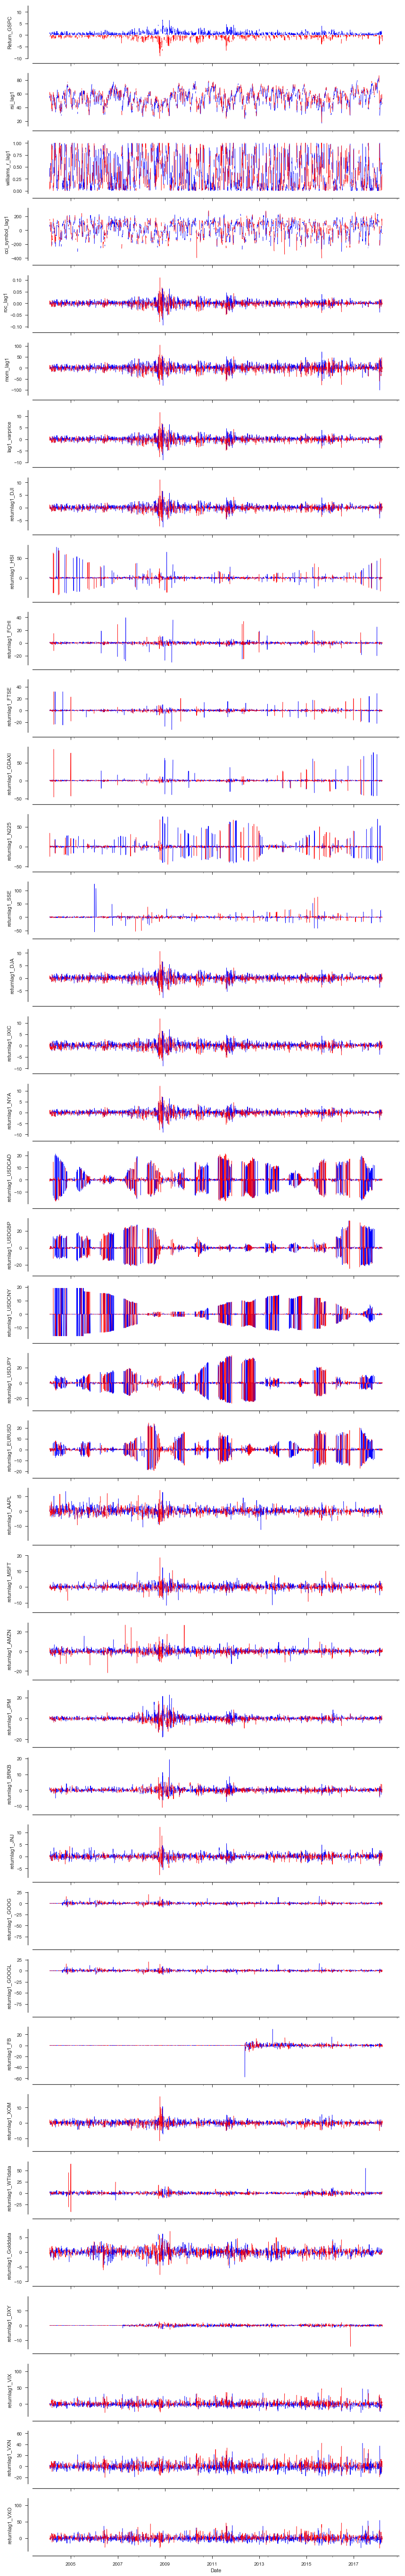

In [3]:
# display features
fig, axs = subplots(len(df.columns), sharex=True, figsize=(12, 2*len(df.columns)))

for j, column in enumerate(df.columns):
    axs[j].set_ylabel(column)
    series = df.get(column)
    up_return = series.mask(dropped["class"]=="DOWN")
    dw_return = series.mask(dropped["class"]=="UP")
    
    up_return.plot(ax=axs[j], lw=1, style="-b")
    dw_return.plot(ax=axs[j], lw=1, style="-r")
    
sns.despine(offset=10)
fig.tight_layout()
# fig.savefig("../data/img/sp500-features.png")

In [4]:
df.describe()

Return_GSPC     rsi_lag1  williams_r_lag1  cci_symbol_lag1  \
count  3556.000000  3556.000000      3556.000000      3556.000000   
mean      0.030716    54.387942         0.381384        25.160435   
std       1.163341    11.059471         0.312774       108.598079   
min      -9.034978    16.457584         0.000000      -401.396755   
25%      -0.390340    46.291741         0.093289       -56.641942   
50%       0.063511    55.350932         0.305007        53.898311   
75%       0.525162    62.799537         0.649847       109.137378   
max      11.580037    86.686650         1.000000       286.419348   

          roc_lag1     mom_lag1  lag1_varprice  returnlag1_DJI  \
count  3556.000000  3556.000000    3556.000000     3556.000000   
mean      0.000247     0.445841       0.031476        0.029930   
std       0.011641    15.157980       1.162559        1.078400   
min      -0.094695  -113.189942      -9.034978       -7.873277   
25%      -0.003906    -5.880005      -0.389790       -0.385755   
50%       0.000642     0.989990       0.064183        0.050185   
75%       0.005238     7.779937       0.525162        0.502117   
max       0.109572   104.130005      11.580037       11.080332   

       returnlag1_HSI  returnlag1_FCHI       ...        returnlag1_GOOG  \
count     3556.000000      3556.000000       ...            3556.000000   
mean         0.220382         0.053881       ...               0.079715   
std          6.493330         2.994603       ...               2.391039   
min        -42.845846       -30.154318       ...             -87.668289   
25%         -0.674470        -0.642934       ...              -0.699293   
50%          0.050731         0.032474       ...               0.001135   
75%          0.787585         0.704339       ...               0.928206   
max         77.317871        44.426303       ...              19.991544   

       returnlag1_GOOGL  returnlag1_FB  returnlag1_XOM  returnlag1_WTIdata  \
count       3556.000000    3556.000000     3556.000000         3556.000000   
mean           0.079511       0.036643        0.028407            0.066515   
std            2.390010       1.781902        1.482072            3.136514   
min          -87.764946     -57.502098      -13.952527          -40.921499   
25%           -0.715504       0.000000       -0.676318           -1.230113   
50%            0.006870       0.000000        0.028676            0.071910   
75%            0.925376       0.000000        0.755557            1.277301   
max           19.991547      29.611471       17.190508           64.581819   

       returnlag1_Golddata  returnlag1_DXY  returnlag1_VIX  returnlag1_VXN  \
count          3556.000000     3556.000000     3556.000000     3556.000000   
mean              0.040524        0.003942        0.266521        0.186155   
std               1.170499        0.683183        7.578482        6.328629   
min              -9.150114      -14.267594      -29.572651      -26.878610   
25%              -0.518958       -0.186862       -3.843312       -3.328221   
50%               0.020638        0.000000       -0.532524       -0.500590   
75%               0.640529        0.191094        3.369162        3.039178   
max               7.080884       18.200541      115.597933       59.825750   

       returnlag1_VXO  
count     3556.000000  
mean         0.339654  
std          8.534074  
min        -31.715458  
25%         -4.295360  
50%         -0.517978  
75%          4.022796  
max        113.674191  

[8 rows x 38 columns]

### Análisis de correlaciones

Una forma de estudiar el poder predictivo de los *candidatos* a features, que ha quedado en duda con los experimentos realizados en Azure ML, es revisando las correlaciones entre los mismos con la variable de clase y con ellos mismos. Ya que no en los experimentos en Azure se vió que no existen correlaciones fuertes entre la variable de clase y los features, de manera global, a continuación se hará un estudio más detallado al respecto.

Para esto tomamos cada serie temporal y la bineamos en intervalos de una semana laboral (5 días). En cada bin se calculará la correlación que existe entre la variable de clase y los features y entre features y features. El umbral para decidir si una correlación con la variable de clase es relevante será 0.2. Una correlación entre features se considerará relevante si es mayor que 0.3 y se buscará que la selección final de features tengan correlaciones entre sí menores que esta cantidad para eliminar información redundante.

Se procede a calcular las correlaciones bineadas de la siguiente forma:

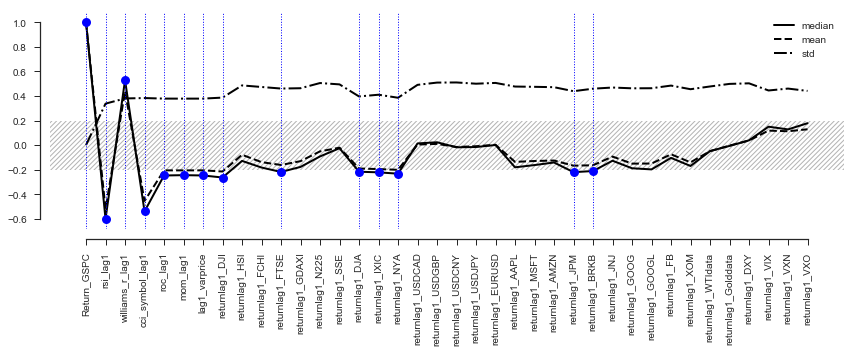

In [5]:
CLASS_THRESHOLD = 0.2
OTHER_THRESHOLD = 0.3

# compute bins
bins = pd.cut(df.index, bins=df.index[::5])

# correlations with GSPC
gr = df.groupby(bins)
corr_with_class_bins = gr.corrwith(df.Return_GSPC)
corr_with_class_stat = corr_with_class_bins.agg(["median", "mean", "std"])
corr_with_class_stat = corr_with_class_stat.transpose()

# filter columns by correlation
filtered_columns = df.columns[np.abs(corr_with_class_stat["median"]) > CLASS_THRESHOLD]
df = df.filter(items=filtered_columns)
# df = df.drop(columns="Return_GSPC")

# plot results
xvals = arange(corr_with_class_stat.index.size)
fig, ax = subplots(1, 1, figsize=(12,5))
corr_with_class_stat.plot(x=xvals, ax=ax, lw=2, style=["k-", "k--", "k-."])
ax.axhspan(-CLASS_THRESHOLD, +CLASS_THRESHOLD, color="0.7", fc="none", hatch="/////", lw=0.0)
for i in xrange(xvals.size):
    if corr_with_class_stat.index[i] in filtered_columns:
        ax.axvline(xvals[i], ls=":", lw=1, color="b")
        ax.plot(xvals[i], corr_with_class_stat["median"][i], "ob", mew=0, ms=9)
ax.set_xticks(xvals)
sns.despine(offset=10, trim=True)
ax.set_xticklabels(corr_with_class_stat.index.values, rotation=90)
fig.tight_layout()
# fig.savefig("../data/img/sp500-feature-correlations.png")

Una vez calculados los bines de correlación con la variable de clase (`corr_with_class_bins`) se calculan las estadísticas: media, mediana y desviación estándar. Estas darán una idea global de los features que estamos considerando relevantes en este ejercicio. En el gráfico anterior se muestran los features fuera de la región sombreada como relevantes de acuerdo a nuestro criterio. Las líneas rojas representan los features relevantes.

A continuación se usarán estos features para estudiar las correlaciones entre sí y verificar cuales ofrecen la misma información y cuales no.

In [6]:
# correlations with eachother
gr = df.groupby(bins)
corr_with_other_bins = gr.corr()
corr_with_other_bins.index.names = ["Daterange", "Symbol"]
corr_with_other_stat = corr_with_other_bins.groupby(level="Symbol", sort=False)

#### Correlaciones entre los features

En los paneles de abajo se aprecian las correlaciones entre los distintos features y la variable de clase como función de los bines temporales calculados anteriormente. Antes de describir los comportamientos observados, se describirá lo que se espera en el mejor de los casos:

1. En el caso de las correlaciones con la variable de clase, las series deberían estar en valores extremos de las distribuciones de correlación, es decir, en valores cercanos a +/-1.
2. En el caso de las correlaciones entre los features, lo que se espera es lo contrario, que las series se concentren en valores cercanos a 0, de manera que los features sean independientes entre sí y la información para la predicción no sea redundante.

En los gráficos estas regiones de comodidad se representan en gris. Estadísticamente la distribución de correlaciones de las series se presentan en azul. Lo ideal sería que las regiones azules se solaparan con las regiones grises, sin embargo esta no es la norma en los gráficos. En resumidas cuentas los features que se presentan como candidatos no son los mejores para una predicción. Aún así una conclusión interesante y positiva se puede derivar de estos resultados: **los features relevantes para la predicción del S&P 500 son función del tiempo**.

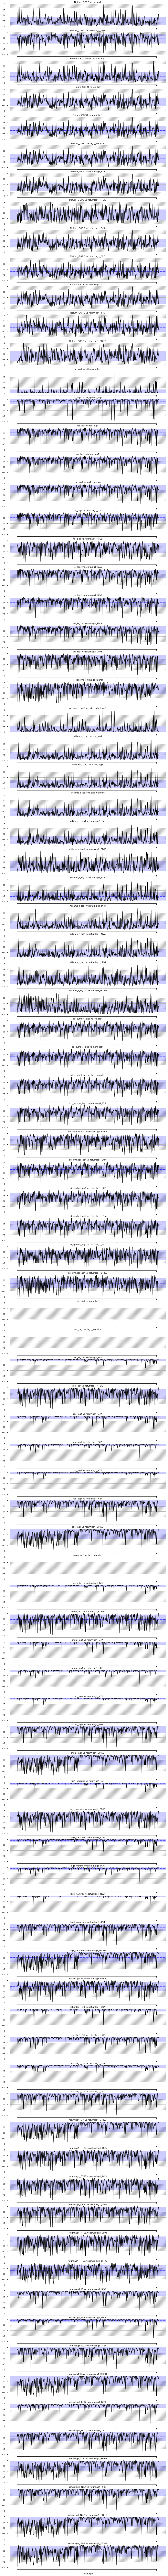

In [7]:
idx = pd.IndexSlice
com = list(it.combinations(corr_with_other_bins.columns.values, 2))

fig, axs = subplots(len(com), sharex=True, sharey=True, figsize=(12, 2*len(com)))
axs[0].set_ylim(-1, +1)

for k, (name_i, name_j) in enumerate(com):
    series = corr_with_other_bins.loc[idx[:,name_i], name_j]
    series.index = series.index.droplevel("Symbol")
    
    axs[k].set_title("{} vs {}".format(name_i, name_j))
    axs[k].axhline(ls="-", color="0.7", lw=1)
    
    if name_i == "Return_GSPC":
        axs[k].axhspan(+0.65, +1.0, hatch="/////", facecolor="none", edgecolor="0.7", lw=0)
        axs[k].axhspan(-0.65, -1.0, hatch="/////", facecolor="none", edgecolor="0.7", lw=0)
    else:
        axs[k].axhspan(-0.5, +0.5, hatch="/////", facecolor="none", edgecolor="0.7", lw=0)
    
    mean, std = series.mean(), series.std()
    axs[k].axhspan(mean-std, mean+std, facecolor="b", alpha=0.2, lw=0)
    axs[k].axhline(mean, ls="-.", color="b", lw=0.7)
    
    series.plot(x=series.index, ax=axs[k], style="k-", lw=1)

sns.despine(offset=10, trim=True)
fig.tight_layout()
# fig.savefig("../data/img/correlations-series.png", bbox_inches="tight")

En los siguientes gráficos se muestran las series colapsadas en el tiempo, es decir las distribuciones de las correlaciones, al igual que los rangos deseados (en gris) y los encontrados (azul).

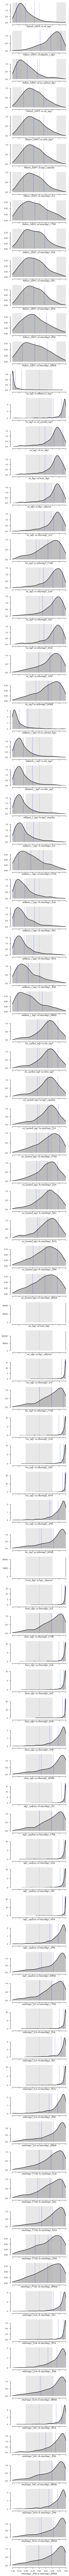

In [8]:
idx = pd.IndexSlice
com = list(it.combinations(corr_with_other_bins.columns.values, 2))

fig, axs = subplots(len(com), sharex=True, figsize=(5, 2*len(com)))
axs[k].set_xlim(-1, +1)

for k, (name_i, name_j) in enumerate(com):
    series = corr_with_other_bins.loc[idx[:,name_i], name_j]
    series.index = series.index.droplevel("Symbol")
    
    axs[k].set_xlabel("{} vs {}".format(name_i, name_j))
    axs[k].axvline(ls="-", color="0.7", lw=1)
    
    if name_i == "Return_GSPC":
        axs[k].axvspan(+0.65, +1.0, hatch="/////", facecolor="none", edgecolor="0.7", lw=0)
        axs[k].axvspan(-0.65, -1.0, hatch="/////", facecolor="none", edgecolor="0.7", lw=0)
    else:
        axs[k].axvspan(-0.5, +0.5, hatch="/////", facecolor="none", edgecolor="0.7", lw=0)
    
    mean, std = series.mean(), series.std()
    axs[k].axvline(mean-std, ls="--", color="b", lw=0.7)
    axs[k].axvline(mean+std, ls="--", color="b", lw=0.7)
    axs[k].axvline(mean, ls="-.", color="b", lw=0.7)
    
    sns.kdeplot(series, color="k", ax=axs[k], shade=True, legend=False)

sns.despine(offset=10, trim=True)
fig.tight_layout()
# fig.savefig("../data/img/correlations-histograms.png", bbox_inches="tight")

### Conclusiones

El resultado más interesante de este ejercicio es que el conjunto de mejores features es función del tiempo. Esto complica un poco el panorama. Una posible solución al problema adicional de variar los features es usar un modelo de ML más flexible. Redes Neuronales podría ser la clave ya que si se introducen varias capas ocultas (como en deep learning) en principio no sería necesario filtrar los features porque el modelo tiene la capacidad de *aprender* qué features son los que proporcionan el mayor poder predictivo (esto tengo que confirmarlo aún, pero lo leí en algún lado). Otra solución más terrenal es usar un arbol de decisión para filtrar los features en el momento de la predicción, es decir, una vez los datos de todos los features han sido publicados, usar un arbol de desiciones entredado específicamente para decidir qué features son los mejores, luego usar un modelo específicamente entrenado para la predicción con esos features. Lo último es la parte complicada porque una vez un modelo ha sido entrenado con un conjunto de features, solo esos features espera para hacer predicciones. Habrá que investigar si esto es así en todos los casos o si existen modelos lo suficientemente flexibles como para permitir entradas variables.

In [9]:
# filtered_columns = df.columns[np.abs(stats["mean"])>0.2]
# filtered_with_gspc = raw_data[filtered_columns]
# filtered_with_gspc = filtered_with_gspc.drop(columns="Return_GSPC")
# filtered_df = raw_data[to_drop+list(filtered_columns)]
# filtered_df.head()
# filtered_df.reset_index().to_csv("../data/processed/sp500-filtered-global.csv", index=False)